In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tomo_encoders.reconstruction.recon import recon_all, fbp_filter, rec_all
from tomo_encoders import DataFile
import dxchange
from tomo_encoders import viewer
import cupy as cp
from tomo_encoders.misc.voxel_processing import modified_autocontrast
from tomo_encoders.misc.viewer import add_scalebar

spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found
olefile module not found


In [3]:
fpath = '/data02/MyArchive/tomo_datasets/Sigray_SSD/Tekawade_SSD_050.h5'
# 3201, 2426, 3232
center = 1615.5
pixel_size = 0.6722679580997339
sino_pos = 1200

In [9]:
raw_data = dxchange.read_aps_32id(fpath, sino = (sino_pos,sino_pos+1))
def recon_and_show(projs, flat, dark, theta, center, res, bar_len):
    if center is None:
        center = projs.shape[-2]/2.0
        print(f"center guessed at {center}")
    flat = np.median(flat, axis = 0).astype(np.float32)
    dark = np.median(dark, axis = 0).astype(np.float32)
    projs = projs.astype(np.float32)
    ntheta, nz, n = projs.shape
#     print(f"shape of projection array: {projs.shape}")
#     print(f'shape of dark: {dark.shape} and flat: {flat.shape}')
    vol = recon_all(projs, theta, center, 1, dark, flat)
    h = modified_autocontrast(vol, s = 0.01)
    vol = np.clip(vol, *h)
    fig, ax = plt.subplots(1,1, figsize = (16,16))
    ax.imshow(vol[0,...], cmap = 'gray')    
    add_scalebar(ax, bar_len, res, loc = 'upper center', fontsize = 32)
    ax.set_title(f"center = {center}")
    return

In [10]:
# for center in np.linspace(1600,1630,30):
#     recon_and_show(*raw_data, center, pixel_size, 1000)

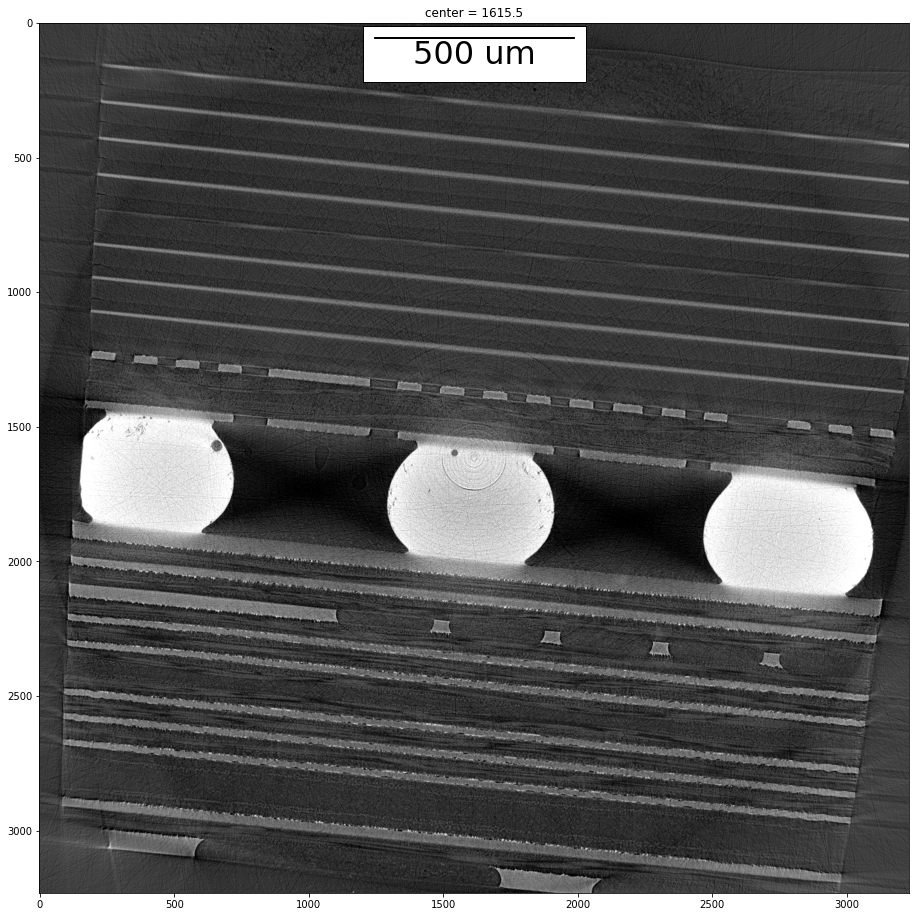

In [11]:
recon_and_show(*raw_data, center, pixel_size, 500)

##### 